In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
veriler = pd.read_csv("satislar.csv")
veriler.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [13]:
aylar = veriler[["Aylar"]]
aylar.head()

,Aylar
0,8
1,10
2,11
3,13
4,14


In [14]:
satislar = veriler[["Satislar"]]
satislar.head()

,Satislar
0,19671.5
1,23102.5
2,18865.5
3,21762.5
4,19945.5


In [21]:
from sklearn.model_selection import train_test_split
#aylar bağımsız değişken satışlar ise bağımlı değişken
x_train, x_test, y_train, y_test = train_test_split(aylar,satislar, test_size = 0.33, random_state=0)

In [23]:
#verilerin ölçeklenmesi
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
x_train

,Aylar
5,19
16,32
8,20
14,29
23,50
20,42
1,10
29,65
6,19
4,14


In [28]:
x_test

,Aylar
2,11
28,64
13,26
10,25
26,59
24,54
27,59
11,25
17,34
22,49


In [29]:
y_train

,Satislar
5,28321.0
16,33014.5
8,32222.5
14,30555.5
23,56906.0
20,45869.0
1,23102.5
29,60936.0
6,30075.0
4,19945.5


In [30]:
y_test

,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


In [35]:
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
#verileri standartize ediyoruz ki aynı dünya ya getirelim
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [32]:
X_train

array([[-0.70368853],
       [ 0.15126015],
       [-0.63792324],
       [-0.0460357 ],
       [ 1.33503524],
       [ 0.80891298],
       [-1.29557607],
       [ 2.32151449],
       [-0.70368853],
       [-1.03251494],
       [ 0.48008657],
       [ 0.48008657],
       [-0.37486211],
       [-0.63792324],
       [ 1.66386166],
       [-1.09828023],
       [-1.42710664],
       [ 0.94044355],
       [ 0.08549487],
       [-0.30909683]])

In [33]:
#şimdi X_train kümemiz ile eğitip X_test kümemiz ile test yapıcaz
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [37]:
Y_test

array([[-1.66597621],
       [ 1.25819492],
       [-0.99762385],
       [-0.7856508 ],
       [ 1.0709181 ],
       [ 0.81055426],
       [ 0.92122098],
       [-1.04207705],
       [-0.09933754],
       [ 0.52977719]])

In [38]:
Y_train

array([[-0.37273507],
       [-0.02812804],
       [-0.08627841],
       [-0.20867319],
       [ 1.72603811],
       [ 0.91567744],
       [-0.75588874],
       [ 2.02192951],
       [-0.24395255],
       [-0.98768258],
       [ 0.53479986],
       [-2.10726078],
       [-0.3526541 ],
       [-0.45338934],
       [ 1.42390581],
       [-0.85427447],
       [-1.00780026],
       [ 1.15558444],
       [ 0.04195344],
       [-0.36117107]])

In [42]:
lr.fit(x_train,y_train)
#model eğitildi x değerleri y değerlerine göre

LinearRegression()

In [43]:
#şimdi ise tahmin işlemine geçiyoruz
tahmin = lr.predict(x_test)
tahmin

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

In [44]:
y_test

,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


Text(0, 0.5, 'satişlar')

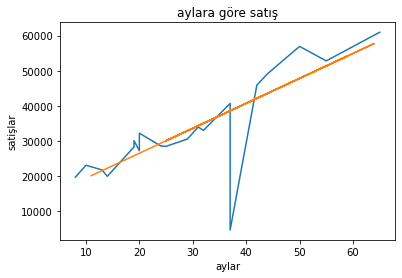

In [85]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()
plt.plot(x_train.values,y_train.values)
plt.plot(x_test.values,lr.predict(x_test))
plt.title("aylara göre satış")
plt.xlabel("aylar")
plt.ylabel("satişlar")